# Clustering
## 背景描述  
使用Datasets4Cluster.py程序生成了一些不同分布的二维数据，分别保存在dataset1.csv、dataset2.csv、dataset3.csv、dataset4.csv、dataset5.csv中。与课件数据集相同。

## 数据描述
|    变量名     |     变量含义      |      变量类型       |  变量取值范围  |
| :-----------: | :---------------: | :-----------------: | :------------: |
| （自变量1）X1 | 数据点在X轴的坐标 | continuous variable | $\mathbb{R}^+$ |
| （自变量2）X2 | 数据点在Y轴的坐标 | continuous variable | $\mathbb{R}^+$ |

## 问题 
课件完成了四种聚类方法对dataset1聚类的不同效果。

在作业中对剩余数据集分别使用层次聚类算法、Kmeans聚类算法、高斯混合模型、DBSCAN聚类算法进行聚类，并且评价聚类结果的有效性。

应当有文字说明，谈谈你对不同聚类方法的理解，比较他们在不同数据集上的效果及产生的原因。

可以参考https://scikit-learn.org/0.23/modules/clustering.html# 网站进行程序编写。

## 解决方案

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

## 一、 对dataset2进行聚类，并且评价聚类结果的有效性

**1：对数据层次聚类，画出聚类树状图并度量聚类有效性**

AgglomerativeClustering是sklearn中用于实现层次聚类的包。n_clusters表示聚类的类别个数，选择不同的linkage，对于dataset2，选择linkage为ward
 

1500
1500
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 515  516]
 [ 255  257]
 [1404 1406]
 ...
 [2918 2995]
 [2992 2996]
 [2994 2997]]


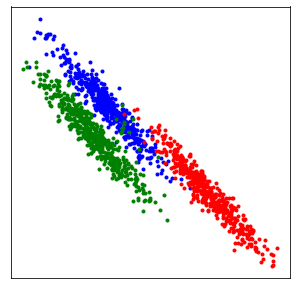

In [2]:
from sklearn.neighbors import kneighbors_graph
#画图    
def draw(model):
    fig = plt.figure(figsize = [5,5])
    ax = fig.add_subplot(1,1,1)
    plt.xticks(())
    plt.yticks(())
    colors = ['blue','red','green','yellow']
    
    k=0
    for i in model.labels_:
        plt.scatter(dataset[k][0], dataset[k][1], c=colors[i], marker='.',label=i)
        k+=1
    #plt.savefig('skl_result'+str(index)+'.jpg')
    plt.show()
       
x = pd.read_csv('dataset2.csv')
data = x.values * 1
dataset = data[:,1:3]
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    x, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
model1 = AgglomerativeClustering(n_clusters=3, linkage='ward',connectivity=connectivity).fit(dataset) #聚类结果
print(len(dataset))
print(len(model1.labels_))
print(model1.labels_[300:350])
print(model1.children_)
draw(model1)

**画层次聚类的树状图**

为了得到完整的树状图，模型参数改为distance_threshold=0, n_clusters=None。

[1.11719245e-04 8.59763133e-04 1.08927186e-03 ... 1.67435366e+01
 2.45860600e+01 6.33651397e+01]


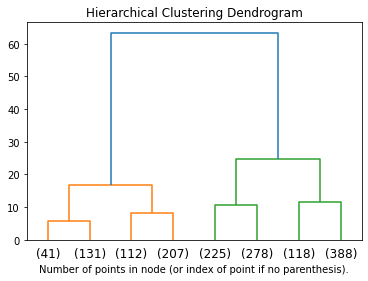

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dataset)
print(clustering.distances_)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level", p=2) #修改p可以展示不同的层数
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**度量外部聚类有效性**

根据真实标签和预测标签，得到可能性矩阵M，进而计算熵和纯度，作为外部度量。熵越接近于0，聚类效果越好，纯度越接近于1，效果越好

In [4]:
def cal_E(labels_,label):
    n_sample = 1500 #样本数
    k4 = 3 #聚类类别数量
    #lable = [2,0,1] #聚类类别
    pred_label = list(labels_) #预测结果
    real_label = [] #真实标签

    for i in range(n_sample):
        if i<n_sample/k4:
            real_label.append(label[0])
        elif i<2*n_sample/k4:
            real_label.append(label[1])
        else:
            real_label.append(label[2])

    print(len(pred_label))
    print(len(real_label))

    #可能性矩阵
    M=[]
    #初值置为0
    for i in range(k4):
        temp = [0 for _ in range(k4)]
        M.append(temp)
    
    print(M)

    #累加得到的可能性矩阵
    for k in range(len(pred_label)):
        if pred_label[k]==label[0]:
            if real_label[k]==label[0]:
                M[0][0]+=1
            elif real_label[k]==label[1]:
                M[0][1]+=1
            else:
                M[0][2]+=1
        elif pred_label[k]==label[1]:
            if real_label[k]==label[0]:
                M[1][0]+=1
            elif real_label[k]==label[1]:
                M[1][1]+=1
            else:
                M[1][2]+=1
        else:
            if real_label[k]==label[0]:
                M[2][0]+=1
            elif real_label[k]==label[1]:
                M[2][1]+=1
            else:
                M[2][2]+=1

    print("该聚类结果的可能性矩阵为：",M)

    # nij/n得到的概率pij
    P = M.copy()
    for i in range(k4):
        for j in range(k4):
            P[i][j] = P[i][j]/n_sample
        
    print(P)

    #pi,即ni./n
    P_=[]
    for i in range(k4):
        P_.append(sum(P[i]))
        print(P_[i])

#     计算熵
    E=0
    purity=0
    for i in range(k4):
        temp = 0
        max_=0
        for j in range(k4):
            if P[i][j] != 0:
                temp += math.log(P[i][j]/P_[i])*P[i][j]/P_[i]
                max_=max(max_,P[i][j]/P_[i])
        E+=temp*P_[i]
        purity+=max_*P_[i]
    E = -E
    print("该聚类结果的熵为：",E)
    print("该聚类结果的纯度为：",purity)
    
label1 = [2,0,1]   
cal_E(model1.labels_,label1)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[13, 499, 0], [487, 1, 0], [0, 0, 500]]
[[0.008666666666666666, 0.33266666666666667, 0.0], [0.32466666666666666, 0.0006666666666666666, 0.0], [0.0, 0.0, 0.3333333333333333]]
0.3413333333333333
0.3253333333333333
0.3333333333333333
该聚类结果的熵为： 0.04518447647222318
该聚类结果的纯度为： 0.9906666666666666


**2：Kmeans聚类，度量聚类有效性**

设置聚类个数n_clusters=3，修改max_iter为400，init='k-means++'

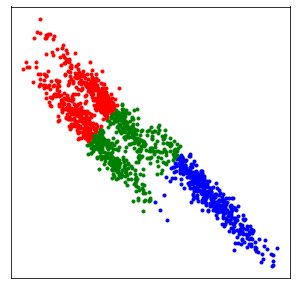

In [5]:
model2 = KMeans(n_clusters=3,max_iter=400,init='k-means++').fit(dataset)
draw(model2)

In [6]:
#kmeans聚类结果的有效性
label2=[0,1,2]
print(model2.labels_)
cal_E(model2.labels_,label2)

[1 1 2 ... 0 0 0]
1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[5, 4, 440], [279, 263, 0], [216, 233, 60]]
[[0.0033333333333333335, 0.0026666666666666666, 0.29333333333333333], [0.186, 0.17533333333333334, 0.0], [0.144, 0.15533333333333332, 0.04]]
0.29933333333333334
0.36133333333333334
0.3393333333333333
该聚类结果的熵为： 0.6141552505919229
该聚类结果的纯度为： 0.6346666666666667


**3：使用高斯混合模型聚类，度量聚类有效性**

设置n_components=3，covariance_type设置为'tied'，表示每个分布有相同的协方差矩阵。设置tol、max_iter参数来控制训练精度。

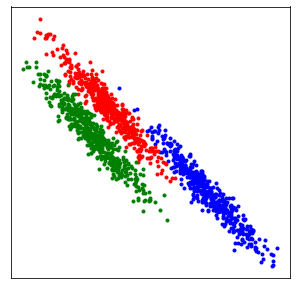

In [7]:
labels_3 = GaussianMixture(n_components=3, covariance_type='tied',tol=1e-5 ,max_iter=50).fit_predict(dataset)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
colors = ['blue','red','green','yellow']
    
k=0
for i in labels_3:
    plt.scatter(dataset[k][0], dataset[k][1], c=colors[i], marker='.',label=i)
    k+=1
plt.show()

In [8]:
#高斯混合模型聚类结果的有效性
label3=[2,1,0]
cal_E(labels_3,label3)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[4, 499, 0], [488, 1, 7], [8, 0, 493]]
[[0.0026666666666666666, 0.33266666666666667, 0.0], [0.3253333333333333, 0.0006666666666666666, 0.004666666666666667], [0.005333333333333333, 0.0, 0.32866666666666666]]
0.3353333333333333
0.3306666666666666
0.334
该聚类结果的熵为： 0.07221380559903652
该聚类结果的纯度为： 0.9866666666666666


**4：使用DBSCAN聚类，度量聚类有效性**

设置eps=0.15,min_samples=24.5

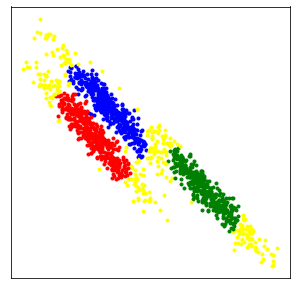

In [9]:
model4 = DBSCAN(eps=.15,min_samples=24.5).fit(dataset)
draw(model4)

In [10]:
label4=[0,1,2]

cal_E(model4.labels_,label4)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[418, 2, 4], [4, 400, 0], [78, 98, 496]]
[[0.2786666666666667, 0.0013333333333333333, 0.0026666666666666666], [0.0026666666666666666, 0.26666666666666666, 0.0], [0.052, 0.06533333333333333, 0.33066666666666666]]
0.2826666666666667
0.2693333333333333
0.44799999999999995
该聚类结果的熵为： 0.3766978217403486
该聚类结果的纯度为： 0.876


## 二、 对dataset3进行聚类，并且评价聚类结果的有效性

**1：对数据层次聚类，画出聚类树状图并度量聚类有效性**

1500
1500
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1400 1401]
 [1068 1070]
 [ 172  174]
 ...
 [2978 2995]
 [2895 2996]
 [2959 2997]]


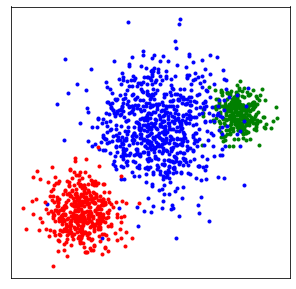

In [11]:
from sklearn.neighbors import kneighbors_graph
#画图    
def draw(model):
    fig = plt.figure(figsize = [5,5])
    ax = fig.add_subplot(1,1,1)
    plt.xticks(())
    plt.yticks(())
    colors = ['blue','red','green','yellow']
    
    k=0
    for i in model.labels_:
        plt.scatter(dataset[k][0], dataset[k][1], c=colors[i], marker='.',label=i)
        k+=1
    #plt.savefig('skl_result'+str(index)+'.jpg')
    plt.show()
       
x = pd.read_csv('dataset3.csv')
data = x.values * 1
dataset = data[:,1:3]
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    x, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
model1 = AgglomerativeClustering(n_clusters=3, linkage='ward',connectivity=connectivity).fit(dataset) #聚类结果
print(len(dataset))
print(len(model1.labels_))
print(model1.labels_[300:350])
print(model1.children_)
draw(model1)

[1.51167077e-03 1.69692323e-03 2.26825600e-03 ... 1.45086675e+01
 2.79598285e+01 5.25436230e+01]


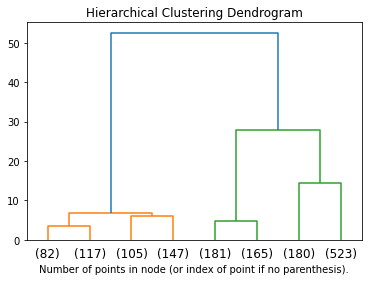

In [12]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dataset)
print(clustering.distances_)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level", p=2) #修改p可以展示不同的层数
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [13]:
label1 = [2,0,1]   
cal_E(model1.labels_,label1)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[301, 0, 0], [199, 500, 50], [0, 0, 450]]
[[0.20066666666666666, 0.0, 0.0], [0.13266666666666665, 0.3333333333333333, 0.03333333333333333], [0.0, 0.0, 0.3]]
0.20066666666666666
0.4993333333333333
0.3
该聚类结果的熵为： 0.4007750927011468
该聚类结果的纯度为： 0.8340000000000001


**2：对数据Kmeans聚类，度量聚类有效性**

设置n_clusters=3,max_iter=400,precompute_distances=False

C:\Users\asus\anaconda3\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


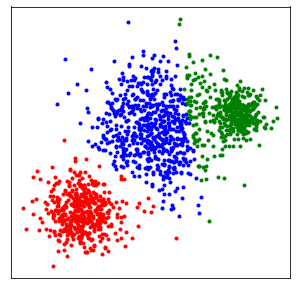

In [14]:
model2 = KMeans(n_clusters=3,max_iter=400,precompute_distances=False).fit(dataset)

draw(model2)


In [15]:
#kmeans聚类结果的有效性
label2=[0,1,2]
print(model2.labels_)
cal_E(model2.labels_,label2)

[2 2 2 ... 1 1 1]
1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[163, 402, 43], [1, 10, 451], [336, 88, 6]]
[[0.10866666666666666, 0.268, 0.028666666666666667], [0.0006666666666666666, 0.006666666666666667, 0.3006666666666667], [0.224, 0.058666666666666666, 0.004]]
0.4053333333333334
0.30800000000000005
0.2866666666666667
该聚类结果的熵为： 0.5321701020246381
该聚类结果的纯度为： 0.7926666666666666


**3：对数据使用高斯混合模型聚类，度量聚类有效性**

设置n_components=3, covariance_type='diag',tol=1e-5 ,max_iter=50，

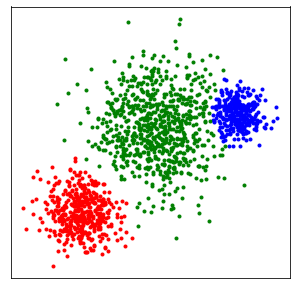

In [16]:
labels_3 = GaussianMixture(n_components=3, covariance_type='diag',tol=1e-5 ,max_iter=50).fit_predict(dataset)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
colors = ['blue','red','green','yellow']
    
k=0
for i in labels_3:
    plt.scatter(dataset[k][0], dataset[k][1], c=colors[i], marker='.',label=i)
    k+=1
plt.show()

In [17]:
#高斯混合模型聚类结果的有效性
label3=[2,1,0]
cal_E(labels_3,label3)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[199, 479, 53], [0, 2, 446], [301, 19, 1]]
[[0.13266666666666665, 0.31933333333333336, 0.035333333333333335], [0.0, 0.0013333333333333333, 0.29733333333333334], [0.20066666666666666, 0.012666666666666666, 0.0006666666666666666]]
0.48733333333333334
0.2986666666666667
0.214
该聚类结果的熵为： 0.46143027517988616
该聚类结果的纯度为： 0.8173333333333334


**Q4：对数据使用DBSCAN聚类，度量聚类有效性**

设置eps=0.16,min_samples=19

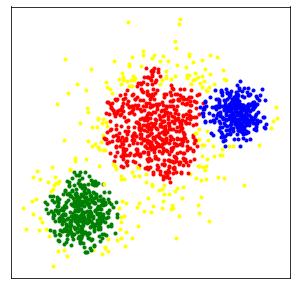

In [18]:
model4 = DBSCAN(eps=0.16,min_samples=19).fit(dataset)
draw(model4)

In [19]:
label4=[0,1,2]
cal_E(model4.labels_,label4)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[300, 29, 2], [145, 356, 42], [55, 115, 456]]
[[0.2, 0.019333333333333334, 0.0013333333333333333], [0.09666666666666666, 0.23733333333333334, 0.028], [0.03666666666666667, 0.07666666666666666, 0.304]]
0.22066666666666668
0.36200000000000004
0.41733333333333333
该聚类结果的熵为： 0.6884541077097874
该聚类结果的纯度为： 0.7413333333333334


## 三、 对dataset4进行聚类，并且评价聚类结果的有效性

**1：对数据层次聚类，画出聚类树状图并度量聚类有效性**

1500
1500
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1350 1351]
 [1137 1157]
 [ 813  814]
 ...
 [2995  529]
 [2993  366]
 [2997 2996]]


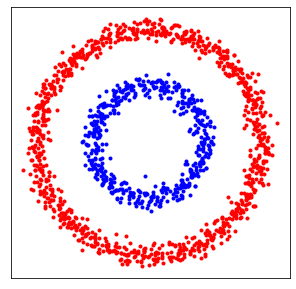

In [20]:
x = pd.read_csv('dataset4.csv')
data = x.values * 1
dataset = data[:,1:3]
model1 = AgglomerativeClustering(n_clusters=2, linkage='single').fit(dataset) #聚类结果
print(len(dataset))
print(len(model1.labels_))
print(model1.labels_[300:350])
print(model1.children_)
draw(model1)

[2.62879161e-04 3.77909951e-04 1.96245913e-03 ... 3.61348295e+01
 4.36873505e+01 5.75796715e+01]


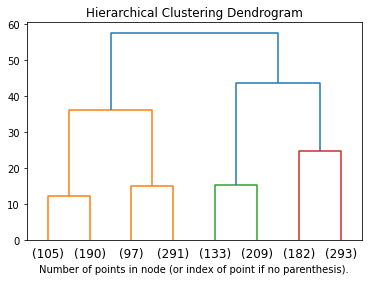

In [21]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dataset)
print(clustering.distances_)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level", p=2) #修改p可以展示不同的层数
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [22]:
def cal_E_(labels_,label):
    n_sample = 1500 #样本数
    k4 = 2 #聚类类别数量
    #lable = [2,0,1] #聚类类别
    pred_label = list(labels_) #预测结果
    real_label = [] #真实标签

    for i in range(n_sample):
        if i<n_sample/k4:
            real_label.append(label[0])
        elif i<2*n_sample/k4:
            real_label.append(label[1])
        else:
            real_label.append(label[2])

    print(len(pred_label))
    print(len(real_label))

    #可能性矩阵
    M=[]
    #初值置为0
    for i in range(k4):
        temp = [0 for _ in range(k4)]
        M.append(temp)
    
    print(M)

    #累加得到的可能性矩阵
    for k in range(len(pred_label)):
        if pred_label[k]==label[0]:
            if real_label[k]==label[0]:
                M[0][0]+=1
            elif real_label[k]==label[1]:
                M[0][1]+=1
        else:
            if real_label[k]==label[0]:
                M[1][0]+=1
            elif real_label[k]==label[1]:
                M[1][1]+=1

    print("该聚类结果的可能性矩阵为：",M)

    # nij/n得到的概率pij
    P = M.copy()
    for i in range(k4):
        for j in range(k4):
            P[i][j] = P[i][j]/n_sample
        
    print(P)

    #pi,即ni./n
    P_=[]
    for i in range(k4):
        P_.append(sum(P[i]))
        print(P_[i])

#     计算熵
    E=0
    purity=0
    for i in range(k4):
        temp = 0
        max_=0
        for j in range(k4):
            if P[i][j] != 0:
                temp += math.log(P[i][j]/P_[i])*P[i][j]/P_[i]
                max_=max(max_,P[i][j]/P_[i])
        E+=temp*P_[i]
        purity+=max_*P_[i]
    E = -E
    print("该聚类结果的熵为：",E)
    print("该聚类结果的纯度为：",purity)
label1 = [1,0]   
cal_E_(model1.labels_,label1)

1500
1500
[[0, 0], [0, 0]]
该聚类结果的可能性矩阵为： [[250, 750], [500, 0]]
[[0.16666666666666666, 0.5], [0.3333333333333333, 0.0]]
0.6666666666666666
0.3333333333333333
该聚类结果的熵为： 0.37489009641253884
该聚类结果的纯度为： 0.8333333333333333


**2：对数据Kmeans聚类，度量聚类有效性**

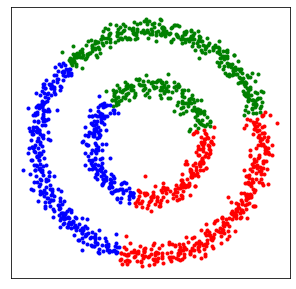

In [23]:
model2 = KMeans(n_clusters=3).fit(dataset)

draw(model2)

In [24]:
#kmeans聚类结果的有效性
label2=[0,1,2]
print(model2.labels_)
cal_E(model2.labels_,label2)

[1 1 1 ... 1 1 1]
1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[169, 123, 205], [167, 38, 295], [164, 339, 0]]
[[0.11266666666666666, 0.082, 0.13666666666666666], [0.11133333333333334, 0.025333333333333333, 0.19666666666666666], [0.10933333333333334, 0.226, 0.0]]
0.3313333333333333
0.3333333333333333
0.33533333333333337
该聚类结果的熵为： 0.8599189613710132
该聚类结果的纯度为： 0.5593333333333333


**3：对数据使用高斯混合模型聚类，度量聚类有效性**

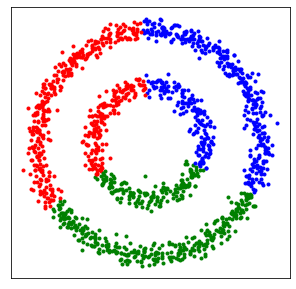

In [25]:
labels_3 = GaussianMixture(n_components=3, covariance_type='full').fit_predict(dataset)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
colors = ['blue','red','green','yellow']
    
k=0
for i in labels_3:
    plt.scatter(dataset[k][0], dataset[k][1], c=colors[i], marker='.',label=i)
    k+=1
plt.show()

In [26]:
#高斯混合模型聚类结果的有效性
label3=[2,1,0]
cal_E(labels_3,label3)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[169, 0, 339], [169, 242, 89], [162, 258, 72]]
[[0.11266666666666666, 0.0, 0.226], [0.11266666666666666, 0.16133333333333333, 0.059333333333333335], [0.108, 0.172, 0.048]]
0.33866666666666667
0.33333333333333337
0.32799999999999996
该聚类结果的熵为： 0.8803564297510338
该聚类结果的纯度为： 0.5593333333333332


**Q4：对数据使用DBSCAN聚类，度量聚类有效性**

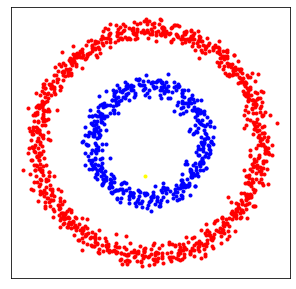

In [27]:
model4 = DBSCAN(eps=0.2).fit(dataset)
draw(model4)

In [29]:
label3=[1,0]

cal_E_(model4.labels_,label3)

1500
1500
[[0, 0], [0, 0]]
该聚类结果的可能性矩阵为： [[250, 750], [500, 0]]
[[0.16666666666666666, 0.5], [0.3333333333333333, 0.0]]
0.6666666666666666
0.3333333333333333
该聚类结果的熵为： 0.37489009641253884
该聚类结果的纯度为： 0.8333333333333333


## 四、 对dataset5进行聚类，并且评价聚类结果的有效性

**1：对数据层次聚类，画出聚类树状图并度量聚类有效性**

1500
1500
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1093 1037]
 [ 336  362]
 [ 527  538]
 ...
 [2994 1272]
 [2995 2996]
 [2997   91]]


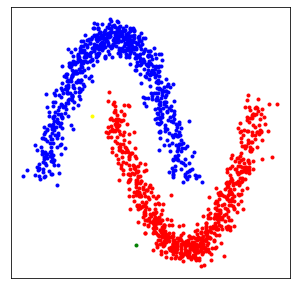

In [30]:
x = pd.read_csv('dataset5.csv')
data = x.values * 1
dataset = data[:,1:3]
model1 = AgglomerativeClustering(n_clusters=4, linkage='single').fit(dataset) #聚类结果
print(len(dataset))
print(len(model1.labels_))
print(model1.labels_[300:350])
print(model1.children_)
draw(model1)

[7.48344794e-04 8.19138671e-04 8.92862965e-04 ... 2.06063887e+01
 2.26421382e+01 5.45377275e+01]


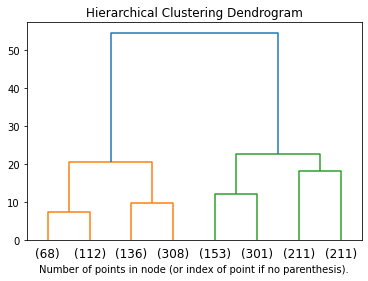

In [31]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dataset)
print(clustering.distances_)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level", p=2) #修改p可以展示不同的层数
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [32]:
label1 = [1,0]   
cal_E_(model1.labels_,label1)

1500
1500
[[0, 0], [0, 0]]
该聚类结果的可能性矩阵为： [[1, 749], [749, 1]]
[[0.0006666666666666666, 0.49933333333333335], [0.49933333333333335, 0.0006666666666666666]]
0.5
0.5
该聚类结果的熵为： 0.010159208324492902
该聚类结果的纯度为： 0.9986666666666667


**2：对数据Kmeans聚类，度量聚类有效性**

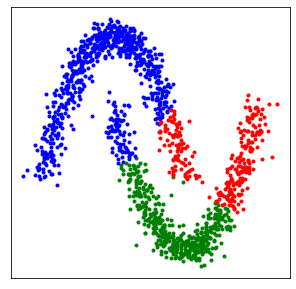

In [33]:
model2 = KMeans(n_clusters=3).fit(dataset)

draw(model2)

In [34]:
#kmeans聚类结果的有效性
label2=[0,1,2]
print(model2.labels_)
cal_E(model2.labels_,label2)

[0 0 0 ... 0 0 0]
1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[500, 155, 84], [0, 272, 0], [0, 73, 416]]
[[0.3333333333333333, 0.10333333333333333, 0.056], [0.0, 0.18133333333333335, 0.0], [0.0, 0.048666666666666664, 0.2773333333333333]]
0.49266666666666664
0.18133333333333335
0.32599999999999996
该聚类结果的熵为： 0.5507921733499985
该聚类结果的纯度为： 0.7919999999999999


**3：对数据使用高斯混合模型聚类，度量聚类有效性**

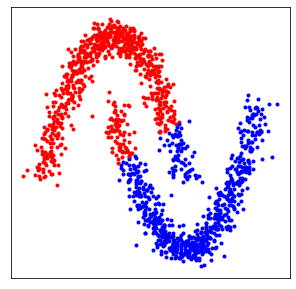

In [35]:
labels_3 = GaussianMixture(n_components=2, covariance_type='spherical').fit_predict(dataset)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
colors = ['blue','red','green','yellow']
    
k=0
for i in labels_3:
    plt.scatter(dataset[k][0], dataset[k][1], c=colors[i], marker='.',label=i)
    k+=1
plt.show()

In [36]:
#高斯混合模型聚类结果的有效性
label3=[2,1,0]
cal_E(labels_3,label3)

1500
1500
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
该聚类结果的可能性矩阵为： [[0, 0, 0], [500, 175, 80], [0, 325, 420]]
[[0.0, 0.0, 0.0], [0.3333333333333333, 0.11666666666666667, 0.05333333333333334], [0.0, 0.21666666666666667, 0.28]]
0.0
0.5033333333333333
0.4966666666666667
该聚类结果的熵为： 0.7678595033069904
该聚类结果的纯度为： 0.6133333333333333


**4：对数据使用DBSCAN聚类，度量聚类有效性**

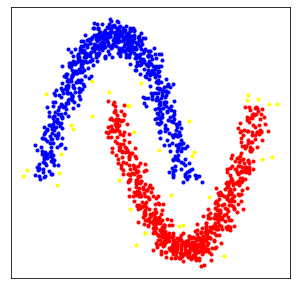

In [37]:
model4 = DBSCAN(eps=0.1,min_samples=5).fit(dataset)
draw(model4)

In [38]:
label4=[0,1,2]

cal_E_(model4.labels_,label4)

1500
1500
[[0, 0], [0, 0]]
该聚类结果的可能性矩阵为： [[734, 0], [16, 750]]
[[0.48933333333333334, 0.0], [0.010666666666666666, 0.5]]
0.48933333333333334
0.5106666666666667
该聚类结果的熵为： 0.05181947837845962
该聚类结果的纯度为： 0.9893333333333334


## 总结

1. 
    层次聚类适用于很多簇，这里主要是通过选择不同的n_clusters，linkage来实现不同的聚类效果

    linkage有"ward","complete","single","average"四种选择，用于度量不同的类间距离

    Ward最小化了所有cluster内的平方差总和。

    Maximum 或 complete linkage 最小化成对聚类间最远样本的距离。

    Average linkage 最小化成对聚类间平均样本的距离值。

    Single linkage 最小化成对聚类间最近样本的距离值。

    **Single linkage 对非全局数据有很好的效果，比如dataset4中的圆形分布数据和dataset5中的波浪形分布数据
    对于协方差较大的dataset2的数据和不同方差，不同size的dataset3中的数据，使用ward linkage效果最好**

2. kmeans算法通过把样本分离成 n 个具有相同方差的类的方式来对数据进行聚类，它可以看成是高斯混合模型的一种特殊情况，也就是每个部分的协方差相同，使用kmeans算法是有一定的假设前提的，它假设簇是凸的，各项同性的，最好簇大小均匀的，规则的平面几何图形，簇的数量也不要太多，这也就意味着它对于细长的簇或具有不规则形状的效果很差。k-means适用于equal variance equal size

   **所以kmeans对于协方差较大的dataset2的数据，不同方差，不同size的dataset3中的数据，dataset4中的圆形分布数据和dataset5中的波浪形分布数据表现都不是特别好。**

    在这里对于kmeans的参数选择，包括聚类个数n_clusters、max_iter设置最大迭代次数、precompute_distances等，这里precompute_distances在现在的版本中实际上是不起作用的，此外，还使用init='k-means++' 参数，将初始化质心（通常）彼此远离，相对随机初始化得到更好的结果。

3. 高斯混合模型可以视为对 k-means聚类算法的扩展，通俗来说，就是多个高斯模型混合得到，数据有很多重叠部分。它包含了数据的协方差结构等的信息。该模型带有不同的选项来约束不同的的协方差估计：spherical，diagonal，tied 或 full 协方差。但是当每个混合模型的点数不足时，估计协方差矩阵将变得困难，该算法会发散并寻找无穷大似然函数值的解。

    比较适用于几何分布，均匀的，以及数据有很多重叠部分的数据。

    **对于协方差较大的dataset2的数据，高斯混合模型表现非常好，对于不同方差，不同size的dataset3中的数据，表现也不错，但是对于dataset4中的圆形分布数据和dataset5中的波浪形分布数据表现不佳。**

4. DBSCAN主要适用于非平面几何，簇大小不均匀的数据分布。该算法有两个参数， min_samples和eps，更高的min_samples或更低的eps 都表示形成簇所需的更高密度。

    如果MinPts不变，Eps取得值过大，会导致大多数点都聚到同一个簇中，Eps过小，会导致一个簇的分裂；如果Eps不变，MinPts的值取得过大，会导致同一个簇中点被标记为噪声点，MinPts过小，会导致发现大量的核心点。所以核心就是如何确定 min_samples和eps的值

    **对于dataset4中的圆形分布数据和dataset5中的波浪形分布数据，DBSCAN算法都表现得很好，对于协方差较大的dataset2的数据和不同方差，不同size的dataset3中的数据，表现一般。**